In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('lipstick_all.xls')
 
 
df1.shape[0],df1.shape[1]

(265, 20)

In [3]:
df2 = pd.read_excel('foundation_all.xls')
 
 
df2.shape[0],df2.shape[1]

(106, 20)

In [5]:
df_test1 = pd.read_excel('test_lipstick1.xlsx')
 
 
df_test1.shape[0],df_test1.shape[1]

(57, 11)

In [7]:
df_test2 = pd.read_excel('test_foundation1.xls')
 
 
df_test2.shape[0],df_test2.shape[1]

(77, 11)

# deal with description

In [8]:
df1.insert(loc=20, column='description_exist', value=1)  
df1["description"].fillna(0, inplace = True)
for i in range(265):
     if df1["description"][i] == 0:
        df1.loc[i,"description_exist"] = 0

In [9]:
df2.insert(loc=20, column='description_exist', value=1)  
df2["description"].fillna(0, inplace = True)
for i in range(106):
     if df2["description"][i] == 0:
        df2.loc[i,"description_exist"] = 0

# deal with timestamp

In [8]:
import time

In [10]:
df1.sort_values(by='date',axis=0,ascending=True, inplace=True)
date_list = [i for i in range(265)]
df1.insert(loc=21, column='date_tuple', value=date_list)

In [11]:
df2.sort_values(by='date',axis=0,ascending=True, inplace=True)
date_list = [i for i in range(106)]
df2.insert(loc=21, column='date_tuple', value=date_list)

In [12]:
df_test1.sort_values(by='time',axis=0,ascending=True, inplace=True)
date_list = [i for i in range(57)]
df_test1.insert(loc=10, column='date_tuple', value=date_list)

In [13]:
df_test2.sort_values(by='time',axis=0,ascending=True, inplace=True)
date_list = [i for i in range(77)]
df_test2.insert(loc=10, column='date_tuple', value=date_list)

# Poisson

In [14]:
import statsmodels # pip install statsmodels
import statsmodels.api as sm

Lipstick

In [19]:
X = df1[['tags','quality','colorful','face',"description_exist","date_tuple"]]
Y = (df1['favorites']-df1['favorites'].min())/(df1['favorites'].max()-df1['favorites'].min())
poisson_training_results = sm.GLM(Y, X, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              favorites   No. Observations:                  265
Model:                            GLM   Df Residuals:                      259
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.430
Date:                Thu, 08 Dec 2022   Deviance:                       35.727
Time:                        16:55:10   Pearson chi2:                     95.3
No. Iterations:                     6   Pseudo R-squ. (CS):           -0.01085
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
tags                 -0.0040      0.02

In [20]:
X_test = df_test1[['tag','quality','colorful','face','Description','date_tuple']]
Y_test = (df_test1["like"]-df_test1['like'].min())/(df_test1['like'].max()-df_test1['like'].min())
poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

        mean   mean_se  mean_ci_lower  mean_ci_upper
53  0.104198  0.082459       0.022093       0.491439
46  0.220160  0.162329       0.051895       0.934002
27  0.133131  0.100947       0.030120       0.588444
28  0.039406  0.038941       0.005681       0.273346
3   0.035865  0.036185       0.004965       0.259102
50  0.026525  0.027757       0.003411       0.206246
56  0.052567  0.046323       0.009346       0.295667
29  0.040717  0.037716       0.006627       0.250177
4   0.073675  0.060538       0.014720       0.368758
48  0.105467  0.080419       0.023663       0.470072
25  0.104021  0.075093       0.025272       0.428156
30  0.050689  0.044721       0.008993       0.285694
0   0.031371  0.030053       0.004798       0.205107
5   0.098816  0.072815       0.023313       0.418850
31  0.041811  0.037695       0.007143       0.244736
6   0.078594  0.061832       0.016816       0.367329
32  0.078221  0.057300       0.018612       0.328746
1   0.037570  0.032057       0.007056       0.

In [21]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = Y_test

In [17]:
predictions_summary_frame['rank'] = predictions_summary_frame["mean"].rank(axis=0,method='min',ascending=True)
df_test1["rank"] = df_test1["like"].rank(axis=0,method='min',ascending=True)

In [29]:
predictions_summary_frame['rank'] = predictions_summary_frame["mean"].rank(axis=0,method='min',ascending=True)
df_test1["rank"] = Y_test.rank(axis=0,method='min',ascending=True)

In [30]:
delta = predictions_summary_frame['rank'] - df_test1["rank"]
change = delta**2
print(change.sum())

32898.0


In [31]:
print(delta)

53     7.0
46    42.0
27    47.0
28   -11.0
3    -29.0
50    -4.0
56    23.0
29   -29.0
4      4.0
48    13.0
25    25.0
30     2.0
0    -32.0
5     35.0
31    -7.0
6     16.0
32    27.0
1    -43.0
7    -33.0
49   -24.0
8    -38.0
33    -4.0
9    -11.0
34    27.0
10     1.0
11     9.0
35     3.0
12    44.0
13    30.0
26    30.0
36   -10.0
14   -10.0
37    19.0
15   -27.0
52     5.0
16     4.0
54   -12.0
17    37.0
18    27.0
19    36.0
20   -22.0
38    14.0
39   -36.0
21    -2.0
47   -20.0
40   -37.0
55     8.0
22     1.0
41     4.0
43   -12.0
42    18.0
51     9.0
44   -28.0
2    -38.0
45   -20.0
23     2.0
24   -30.0
Name: rank, dtype: float64


In [32]:
import scipy.stats as ss

data1 = Y_test.values.tolist()
data2 = predictions_summary_frame['mean'].values.tolist()

stat, p = ss.ranksums(data1, data2)
print(stat,p)

-2.553063651338985 0.010677998035961233


In [33]:
from matplotlib import pyplot as plt

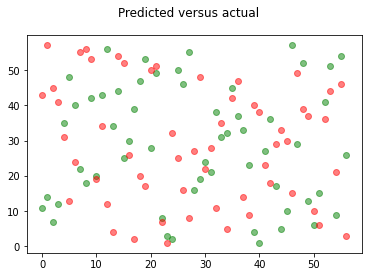

In [34]:
fig = plt.figure()
fig.suptitle('Predicted versus actual')
predicted = plt.plot(df_test1.index, predictions_summary_frame["rank"], 'go', label='Predicted counts', alpha=0.5)
actual = plt.plot(df_test1.index, df_test1["rank"], 'ro', label='Actual counts', alpha=0.5)
plt.show()

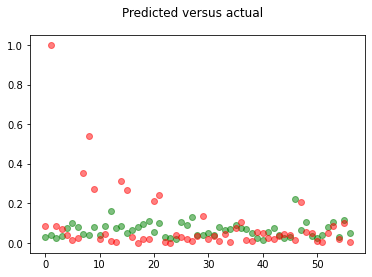

In [36]:
fig = plt.figure()
fig.suptitle('Predicted versus actual')
predicted = plt.plot(df_test1.index, predictions_summary_frame["mean"], 'go', label='Predicted counts', alpha=0.5)
actual = plt.plot(df_test1.index, Y_test, 'ro', label='Actual counts', alpha=0.5)
plt.show()

Foundation

In [37]:
X = df2[['tags','quality','colorful','face',"description_exist","date_tuple"]]
Y = (df2['favorites']-df2['favorites'].min())/(df2['favorites'].max()-df2['favorites'].min())
poisson_training_results = sm.GLM(Y, X, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              favorites   No. Observations:                  106
Model:                            GLM   Df Residuals:                      100
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.421
Date:                Thu, 08 Dec 2022   Deviance:                       11.361
Time:                        17:38:05   Pearson chi2:                     22.7
No. Iterations:                     7   Pseudo R-squ. (CS):            0.04632
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
tags                  0.0133      0.03

In [38]:
X_test = df_test2[['tag','quality','colorful','face','Description','date_tuple']]
Y_test = (df_test2["like"]-df_test2['like'].min())/(df_test2['like'].max()-df_test2['like'].min())
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

        mean   mean_se  mean_ci_lower  mean_ci_upper
76  0.546848  0.421493   1.207226e-01       2.477110
32  0.686467  0.472803   1.779736e-01       2.647789
33  0.088131  0.114596   6.891454e-03       1.127054
74  0.387617  0.371441   5.925453e-02       2.535615
0   0.287555  0.207079   7.010353e-02       1.179514
..       ...       ...            ...            ...
30  0.000555  0.001953   5.611324e-07       0.548946
59  0.000402  0.001432   3.704804e-07       0.435121
64  0.000266  0.000952   2.360838e-07       0.298801
31  0.000224  0.000747   3.193495e-07       0.156469
60  0.001570  0.006828   3.121697e-07       7.896830

[77 rows x 4 columns]


In [39]:
import scipy.stats as ss

data1 = Y_test.values.tolist()
data2 = predictions_summary_frame['mean'].values.tolist()

stat, p = ss.ranksums(data1, data2)
print(stat,p)

2.9613040914970745 0.0030633931339710003


In [40]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = Y_test

In [41]:
predictions_summary_frame['rank'] = predictions_summary_frame["mean"].rank(axis=0,method='min',ascending=True)
df_test2["rank"] = Y_test.rank(axis=0,method='min',ascending=True)

In [42]:
delta = predictions_summary_frame['rank'] - df_test2["rank"]
change = delta**2
print(change.sum())

30935.0


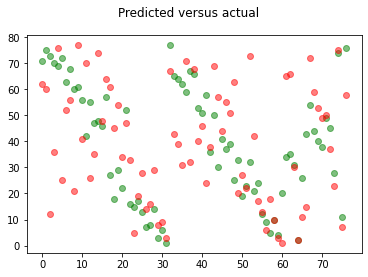

In [43]:
fig = plt.figure()
fig.suptitle('Predicted versus actual')
predicted = plt.plot(df_test2.index, predictions_summary_frame["rank"], 'go', label='Predicted counts', alpha=0.5)
actual = plt.plot(df_test2.index, df_test2["rank"], 'ro', label='Actual counts', alpha=0.5)
plt.show()

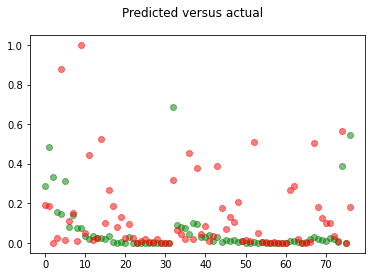

In [44]:
fig = plt.figure()
fig.suptitle('Predicted versus actual')
predicted = plt.plot(df_test2.index, predictions_summary_frame["mean"], 'go', label='Predicted counts', alpha=0.5)
actual = plt.plot(df_test2.index, Y_test, 'ro', label='Actual counts', alpha=0.5)
plt.show()